# Module Installation

In [45]:
!pip install opencv-python
!pip install imutils

**library import**

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import imutils#Use for image utilise
import cv2

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# OpenCV Basic Operation on Images

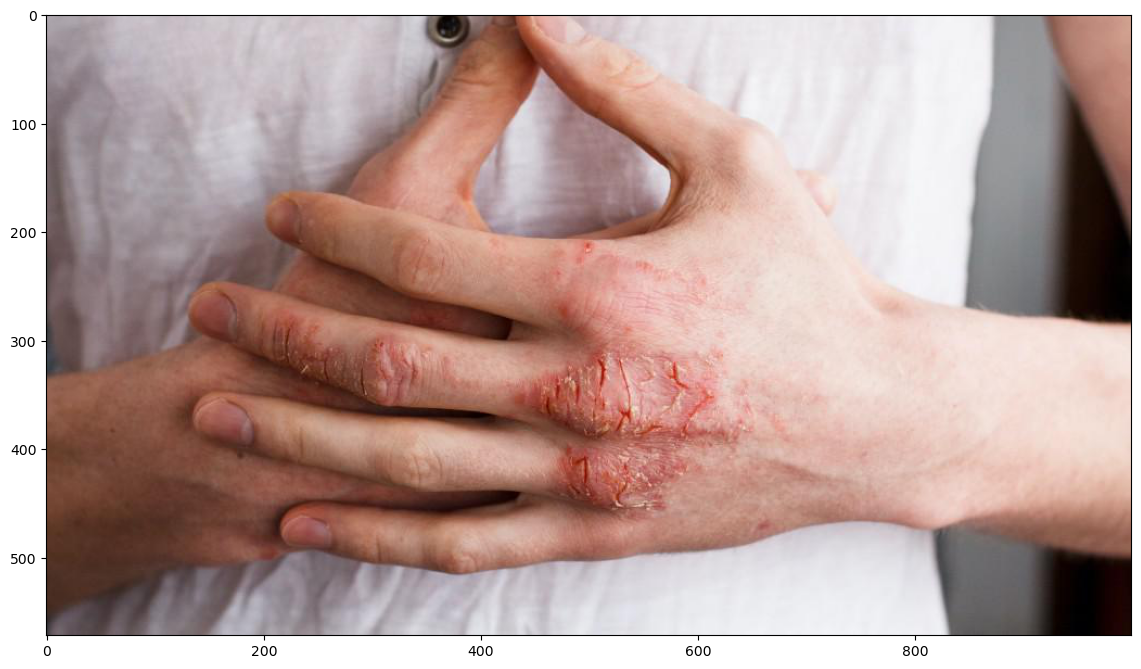

In [47]:
plt.figure(figsize=(14, 10))
imagedata = plt.imread("../input/skinimagedataset/skin.jpg")#Image read 
plt.imshow(imagedata)#image show 
plt.grid(False)
plt.show()#<matplotlib.image.AxesImage at 0x1396fd2bb50> ignore this messages

In [48]:
len(imagedata.shape)#Length of image

3

In [49]:
def skinimageShow(imageTitle, image):#Create a custom function for easily call anytime
    if len(image.shape) == 3:
        imageVariable = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)#If colorchannel is 3 then it will convert to RGB
    plt.figure(figsize=(4, 2))
    plt.imshow(imageVariable)
    plt.title(imageTitle)
    plt.show()

Image color channel list
***Gray image = 1 channel,
***RGB= 3 channel,
***BGR=3 channel,
***GBR=3 channel,
***CMYK=4 channel

In [50]:
imagedata.shape#shape of image,Image width =572, Hight=1000, color channel=3 ,here 3 means color channel , it's RGB image now

(572, 1000, 3)

In [51]:
cv2.split(imagedata) #we can see array of color channel
#Here fist array is for Red color, 2nd array is used for Green color, 3rd array all number is for Blue color

(array([[175, 175, 175, ..., 210, 211, 211],
        [175, 175, 175, ..., 210, 211, 211],
        [174, 174, 174, ..., 210, 210, 211],
        ...,
        [ 60,  64,  72, ...,  28,  28,  27],
        [ 60,  64,  72, ...,  28,  28,  27],
        [ 60,  64,  72, ...,  28,  28,  27]], dtype=uint8),
 array([[168, 168, 168, ..., 163, 164, 164],
        [168, 168, 168, ..., 163, 164, 164],
        [167, 167, 167, ..., 163, 163, 164],
        ...,
        [ 58,  62,  67, ...,   9,   9,   8],
        [ 58,  62,  67, ...,   9,   9,   8],
        [ 58,  62,  67, ...,   9,   9,   8]], dtype=uint8),
 array([[175, 175, 175, ..., 145, 146, 146],
        [175, 175, 175, ..., 145, 146, 146],
        [174, 174, 174, ..., 145, 145, 146],
        ...,
        [ 61,  65,  71, ...,   3,   3,   2],
        [ 61,  65,  71, ...,   3,   3,   2],
        [ 61,  65,  71, ...,   3,   3,   2]], dtype=uint8))

# Image Histogram

Image histograms are plots that display the frequency distribution and helps to visualize the color intensity distribution. An image histogram is a type of histogram that acts as a graphical representation of the tonal distribution in a digital image. It plots the number of pixels for each tonal value. By looking at the histogram for a specific image a viewer will be able to judge the entire tonal distribution at a glance.

In [52]:
def imageHistogram(image, imageTitle, mask = None):##Create a custom function for easily call anytime
    color_Channel = cv2.split(image)#Here split color channel
    color_com = ('b', 'g', 'r')#Touple is immutable condition that's why we use touple, Here it is important to use touple 
    #because of security problem, if we use tuple then no one will change the color combination.If we take as a input 5 image
    #then 5 image output will come as a bgr order.
    plt.figure(figsize = (4, 2))
    plt.title(imageTitle) #When we call this function then we need to set imageTitle
    plt.xlabel("Bins")#Xlabel shows Bins, Bins is plotted as a bar whose height corresponds to how many data points are
    #in that bin.Bins are also sometimes called "intervals", "classes", or "buckets".
    plt.ylabel("Pixel Information")#Ylabel shows Pixel Information
    
    for (color_Channel, color_com) in zip(color_Channel, color_com): #Python zip() method takes iterable or containers
        #and returns a single iterator object, having mapped values from all the containers. It is used to map the similar
        #index of multiple containers so that they can be used just using a single entity.
        histogram = cv2.calcHist([color_Channel], [0], mask, [256], [0, 256])#Here we call build in function calcHist for histogram
        #in this function at first pass color channel([color_Channel]). color channel is array number of channel order.
        #here [0] means optimal value or central value of normal distibution.
        #mask not use it's none here
        #[256] means X Panel heights range.
        #[0,256] means y panel range here we define boundary that histogram range 0-256.
        plt.plot(histogram, color = color_com)
        plt.xlim([0, 256]) #There is 2 types of limitation is matplotlib that is x limitation and y limitation,
        #Here used xlim which one range is [0,256].
        plt.show()

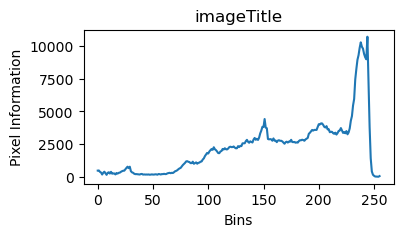

In [53]:
image_argument = {"Image":"../input/skinimagedataset/skin.jpg"} #In image argument we can use scharr and sobel,If we use argument we can quickly addressing
#through the dictionary
image = cv2.imread(image_argument["Image"])#read image using image_argument variable
image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)#convert BGR to RGB
smaplehisto = cv2.calcHist([image],[0], None, [256], [0, 256]) #in this calcHist function at first pass image([image]),
#[0]=In the case of color images if use [0] it will be  Red , [1] = Green , [2]=Blue, In the case of gray image then [0] means gray
#None means Mask not use
#[256] means Bins range
#[0,256] panel range
plt.figure(figsize = (4, 2))
plt.title("imageTitle")
plt.xlabel("Bins")
plt.ylabel("Pixel Information")
plt.plot(smaplehisto)#smaplehisto variable represent Maximum value or Maximum pixel information as a line.
plt.show()

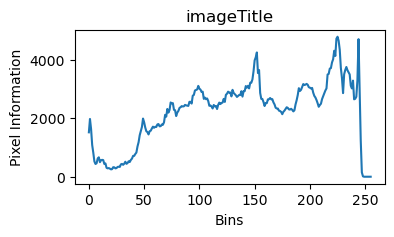

In [54]:
image_argument = {"Image":"../input/skinimagedataset/skin.jpg"}
image = cv2.imread(image_argument["Image"])
image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
smaplehisto = cv2.calcHist([image],[1], None, [256], [0, 256]) #Here we change color as [1] 
#[1]means Green color and plot showing green color ratio. 
plt.figure(figsize = (4, 2))
plt.title("imageTitle")
plt.xlabel("Bins")
plt.ylabel("Pixel Information")
plt.plot(smaplehisto)
plt.show()

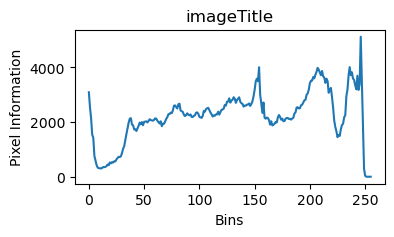

In [55]:
image_argument = {"Image":"../input/skinimagedataset/skin.jpg"}
image = cv2.imread(image_argument["Image"])
image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
smaplehisto = cv2.calcHist([image],[2], None, [256], [0, 256])#Here we change color as [2]
#[2]means Blue color and plot showing Blue color ratio. 
plt.figure(figsize = (4, 2))
plt.title("imageTitle")
plt.xlabel("Bins")
plt.ylabel("Pixel Information")
plt.plot(smaplehisto)
plt.show()

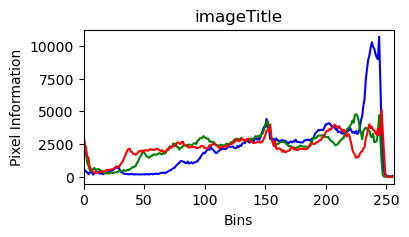

In [56]:
color_Channel = cv2.split(image)
color_com = ('b', 'g', 'r')
plt.figure(figsize = (4, 2))
plt.title("imageTitle")
plt.xlabel("Bins")
plt.ylabel("Pixel Information")

for (color_Channel, color_com) in zip(color_Channel, color_com):
    histogram = cv2.calcHist([color_Channel], [0],None, [256], [0, 256])
    plt.plot(histogram, color = color_com)
    plt.xlim([0, 256])
    
#Here we can see the three color channel in one plot.

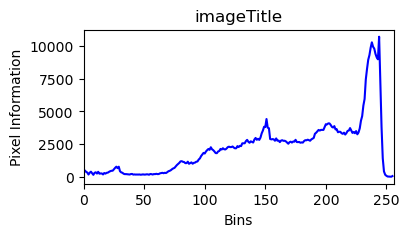

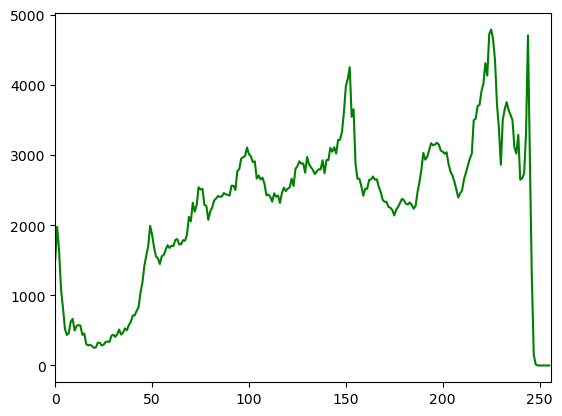

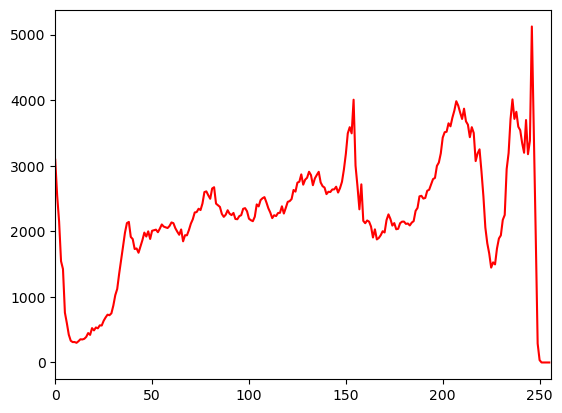

In [57]:
color_Channel = cv2.split(image)
color_com = ('b', 'g', 'r')
plt.figure(figsize = (4, 2))
plt.title("imageTitle")
plt.xlabel("Bins")
plt.ylabel("Pixel Information")

for (color_Channel, color_com) in zip(color_Channel, color_com):
    histogram = cv2.calcHist([color_Channel], [0],None, [256], [0, 256])
    plt.plot(histogram, color = color_com)
    plt.xlim([0, 256])
    plt.show() # Here use plt.show that's why 3 color ratio represent in 3 box.

 Axes of canvas

Image Shape: (32, 32) with 1024


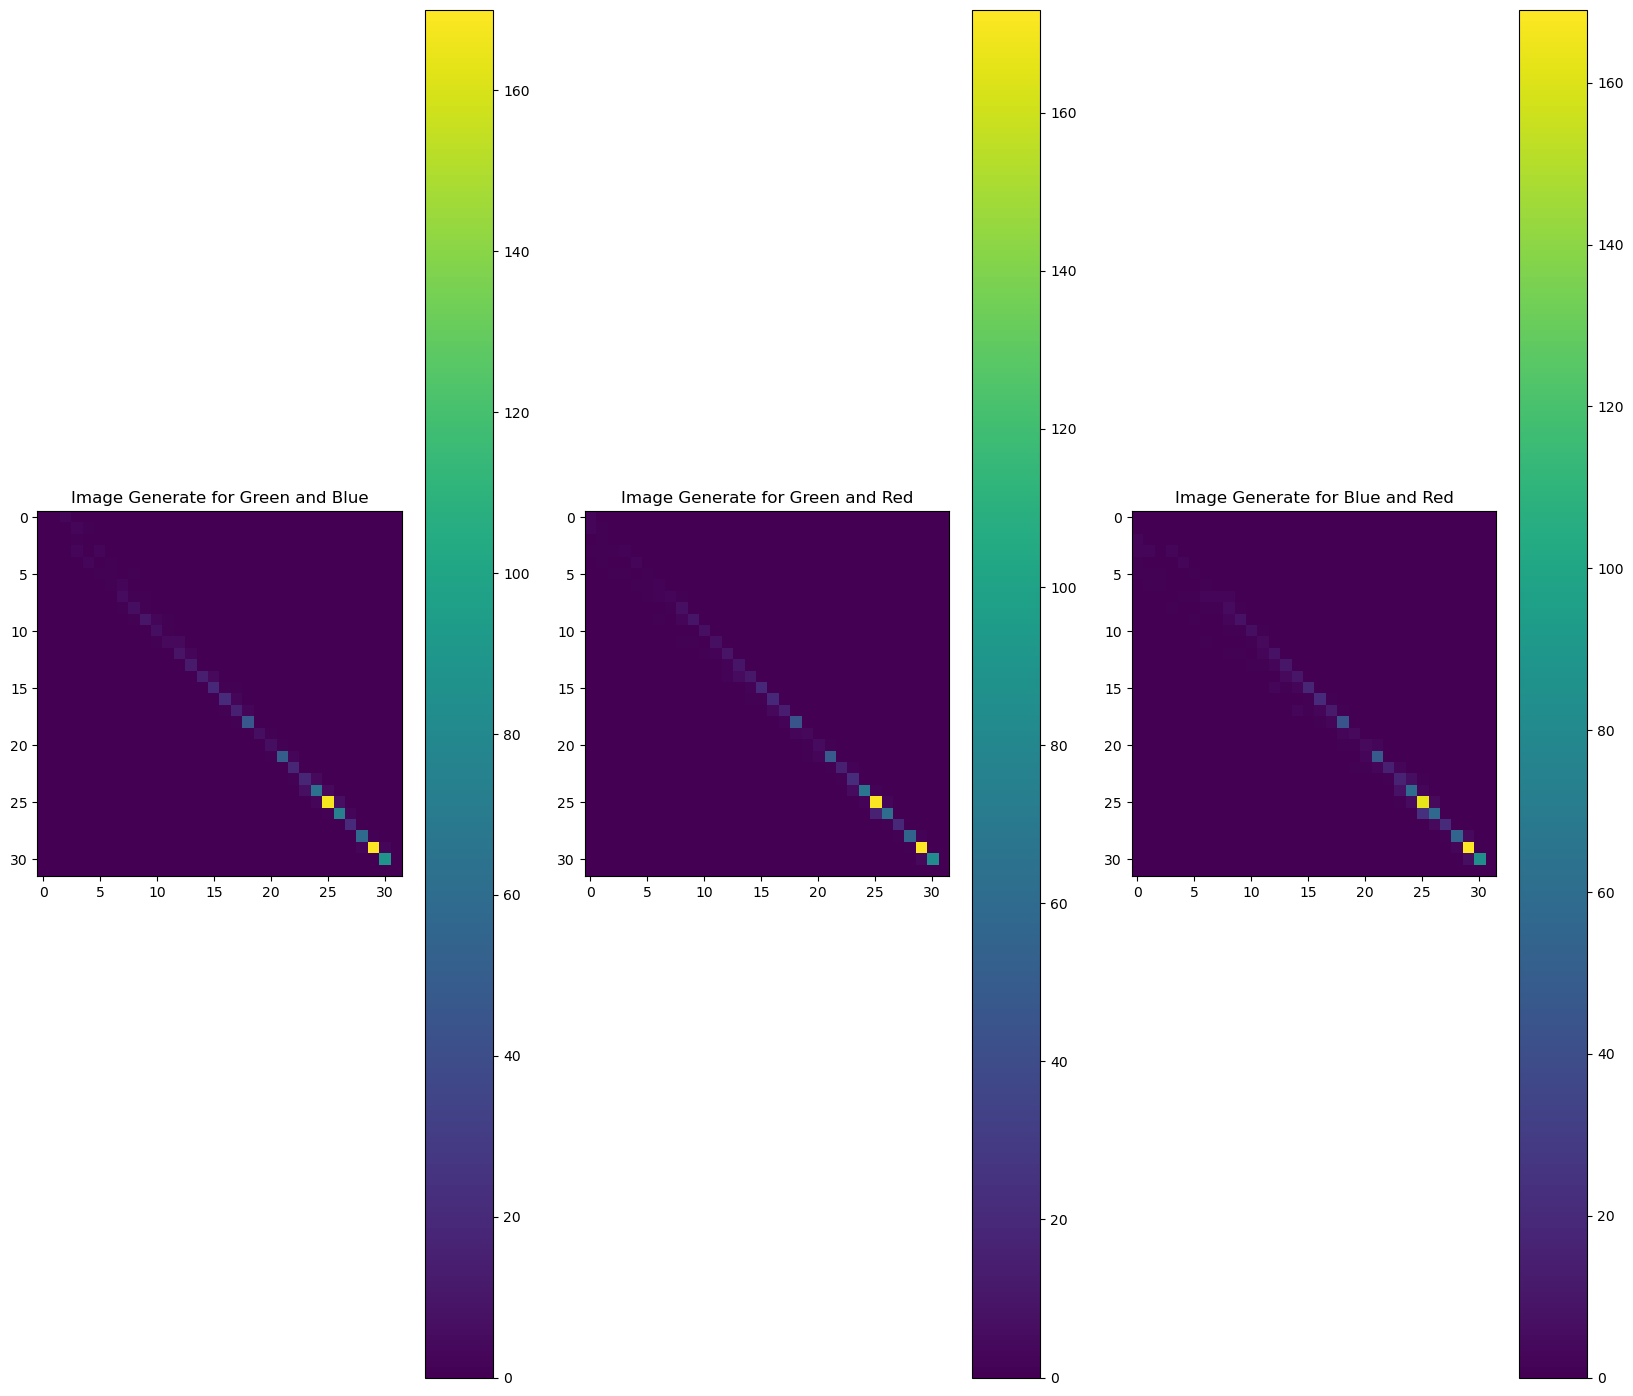

In [58]:
color = ["B", "G", "R"]
fig = plt.figure(figsize=(20, 18))#Here we create canvas size as a (20,18)
ax = fig.add_subplot(131)#subplot is one kind of  plot that which one showing summary of full figure . 
hist = cv2.calcHist([color_Channel[1], color_Channel[0]], [0, 1], None, [32, 32], [0, 256, 0, 256]) #in this calcHist function
#color_channel[1] means Green color array and color_Channel[0] means Blue color array 
#[0,1] is blue, green color channel
#None means Mask not use
#[32,32] means Bin
#[0, 256, 0, 256] is range
#Here we take 2 types [32,32] & [0, 256, 0, 256] cause we use 2 color channel
p = ax.imshow(hist, interpolation = "nearest")#interpolation way of changing, if we machup old image and orginal image,
#we can see co-realation of two object , here use nearest cause we need to get closest value of interpolation.
ax.set_title("Image Generate for Green and Blue")
plt.colorbar(p)


ax = fig.add_subplot(132)
hist = cv2.calcHist([color_Channel[1], color_Channel[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("Image Generate for Green and Red")
plt.colorbar(p)



ax = fig.add_subplot(133)
hist = cv2.calcHist([color_Channel[0], color_Channel[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("Image Generate for Blue and Red")
plt.colorbar(p)
#Here we use 3 combination pair, we can create total=2^3=8 combination

print("Image Shape: {} with {}".format(hist.shape, hist.flatten().shape[0]))#Here we use docstring, we use hist.shape for 
#calculate hisogram and we use flatten for get data multidimensional to single dimensional data.

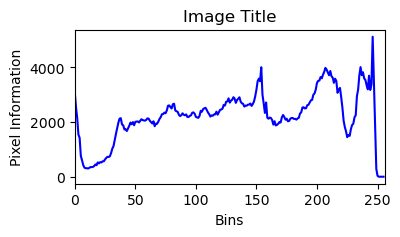

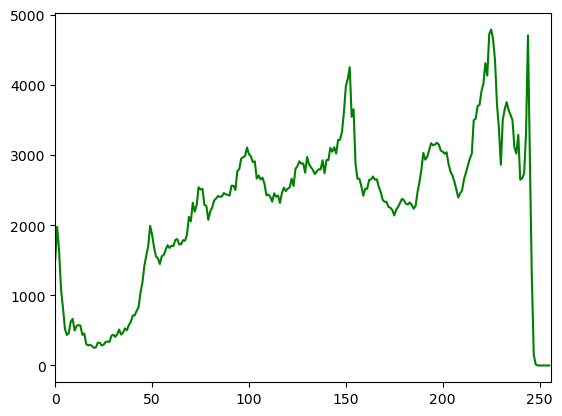

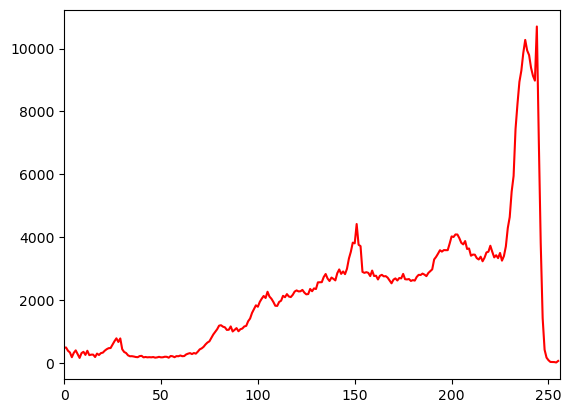

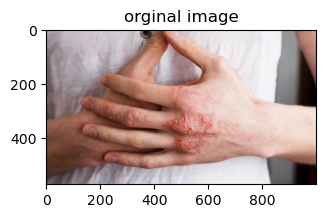

In [59]:
image = cv2.imread("../input/skinimagedataset/skin.jpg")
imageHistogram(image, "Image Title")
skinimageShow("orginal image", image)#Here we call imageHistogram,skinmageShow function.

In [60]:
image.shape[:2] #Here [:2] means it's take index of 0,1 number value not touch in 2 number index
#0 index value is 572 and 1 index value is 1000

(572, 1000)

# Image Masking
Image_mask is one kind of shadow information, Using this mask we can set any formate of this picture.

In [61]:
image.shape[:2] #Here [:2] means it's take index of 0,1 number value not touch in 2 number index
#0 index value is 572 and 1 index value is 1000

(572, 1000)

In [62]:
def skinimageShow(imageTitle, image):
    imageVariable = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(4, 2))
    plt.imshow(imageVariable)
    plt.title(imageTitle)
    plt.show()

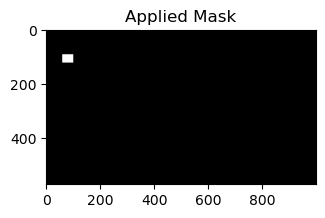

In [63]:
mask = np.zeros(image.shape[:2], dtype= "uint8")
#Here np.zeros means all array number we set as 0 
cv2.rectangle(mask, (60, 90), (100, 120), 255, -1)
#Now we can see the one small shape of rectangle,rectangle have four point that's why we see (60, 90), (100, 120) and we set color 255,
#color 255 means white and color 0 means black
skinimageShow("Applied Mask", mask) 
#Here we call skinimageShow function and see the masked image .
#Bellow image dimension come from skin image dimension , this is the masked image

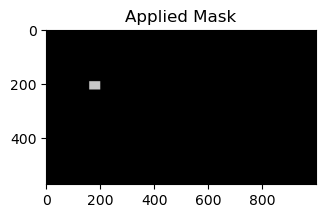

In [64]:
mask = np.zeros(image.shape[:2], dtype= "uint8")
cv2.rectangle(mask, (160, 190), (200, 220), 200, -1)#Here we change rectangle value and see the relocate 
skinimageShow("Applied Mask", mask)

# Image Blurring
Image blurring is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noise. It actually removes high frequency content (eg: noise, edges) from the image. So edges are blurred a little bit in this operation (there are also blurring techniques which don't blur the edges). OpenCV provides four main types of blurring techniques. 
1.Averaging 
2.Gaussian Blurring 
3.Median Blurring 
4.Bilateral Filtering

# Gaussian Blurring

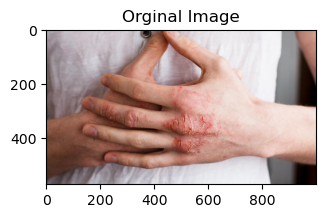

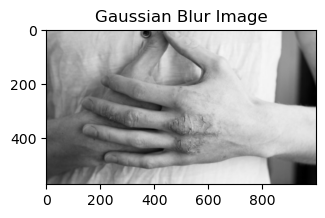

In [65]:
image = cv2.imread("../input/skinimagedataset/skin.jpg")#read image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)#Convert BGR to GRAY
blurImage = cv2.GaussianBlur(gray, (5, 5), 0) #Here we called GaussianBlur filter  for image blur , 
#gray is used for we already convert as a gray image.
#(5, 5) means We will blur in which position.
#0 means Gaussian border defualt value.
skinimageShow("Orginal Image", image)#Orginal image show
skinimageShow("Gaussian Blur Image", blurImage)#Blur imag show

# Median Blurring

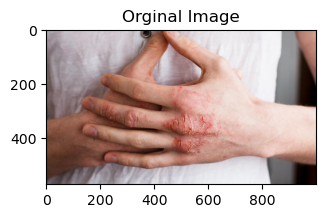

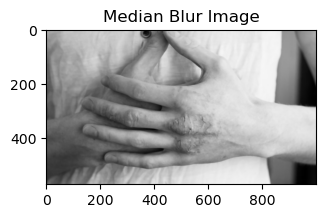

In [66]:
image = cv2.imread("../input/skinimagedataset/skin.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurImage = cv2.medianBlur(gray, 5)
skinimageShow("Orginal Image", image)
skinimageShow("Median Blur Image", blurImage)

# Bilateral Filtering

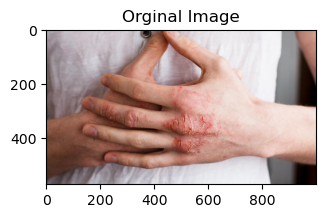

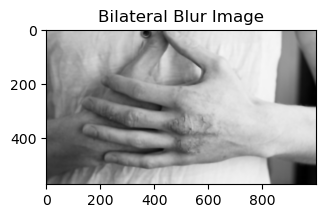

In [67]:
image = cv2.imread("../input/skinimagedataset/skin.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurImage = cv2.bilateralFilter(gray,9,75,75)
skinimageShow("Orginal Image", image)
skinimageShow("Bilateral Blur Image", blurImage)

# OpenCV Edge Detection Canny Blur
Canny Edge Detection is one of the most popular edge-detection methods in use today because it is so robust and flexible. The algorithm itself follows a three-stage process for extracting edges from an image. Add to it image blurring, a necessary preprocessing step to reduce noise. This makes it a four-stage process, which includes:

Noise Reduction,Calculating the Intensity Gradient of the Image,Suppression of False Edges,Hysteresis Thresholding

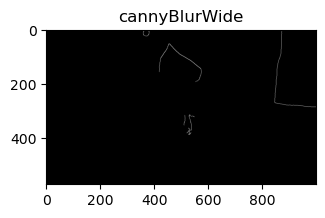

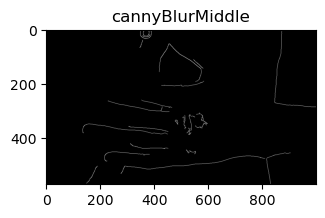

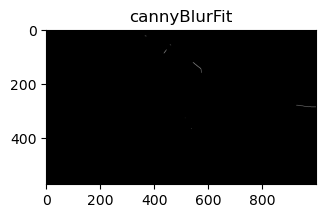

In [68]:
#CannyBlurMiddle count the middle value 
#CannyBlurWide spreadout image , 
#CannyBlurFit try to  fit image,


cannyBlurWide = cv2.Canny(blurImage, 20, 250)
#cannyBlurWide is variable 
#cv2.Canny is build in function for image blur
#blurImage is a variable that it has already been applied gaussian blur
#(20, 250) means threshold1, threshold2 which one is used for image edge,border edge,rectangle or circle edge detection
#threshold1 value is 20 and threshold2 value is 250 both of the value take a positin of 20 to 250 area for blur.
cannyBlurMiddle = cv2.Canny(blurImage, 15, 120)
cannyBlurFit = cv2.Canny(blurImage, 240, 250)

skinimageShow("cannyBlurWide",cannyBlurWide) #Here we call skinimageShow function and add a title of cannyBlurWide.
skinimageShow("cannyBlurMiddle", cannyBlurMiddle)
skinimageShow("cannyBlurFit", cannyBlurFit)